In [2]:
import pandas as pd
import numpy as np

In [3]:

circuits = pd.read_csv('../raw_data/circuits.csv')
constructor_results = pd.read_csv('../raw_data/constructor_results.csv')
constructor_standings = pd.read_csv('../raw_data/constructor_standings.csv')
constructors = pd.read_csv('../raw_data/constructors.csv')
driver_standings = pd.read_csv('../raw_data/driver_standings.csv')
drivers = pd.read_csv('../raw_data/drivers.csv')
lap_times = pd.read_csv('../raw_data/lap_times.csv')
pit_stops = pd.read_csv('../raw_data/pit_stops.csv')
qualifying = pd.read_csv('../raw_data/qualifying.csv')
races = pd.read_csv('../raw_data/races.csv')
results = pd.read_csv('../raw_data/results.csv')
seasons = pd.read_csv('../raw_data/seasons.csv')
sprint_results = pd.read_csv('../raw_data/sprint_results.csv')
status = pd.read_csv('../raw_data/status.csv')

In [20]:
seasons

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...
...,...,...
68,2018,http://en.wikipedia.org/wiki/2018_Formula_One_...
69,2019,http://en.wikipedia.org/wiki/2019_Formula_One_...
70,2020,http://en.wikipedia.org/wiki/2020_Formula_One_...
71,2021,http://en.wikipedia.org/wiki/2021_Formula_One_...


In [9]:
results_joined.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality_x', 'url_x', 'year', 'round',
       'circuitId', 'name_x', 'date', 'time_y', 'url_y', 'fp1_date',
       'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time',
       'constructorRef', 'name_y', 'nationality_y', 'url'],
      dtype='object')

In [14]:
results_joined = results.merge(drivers, on='driverId', how='left')
results_joined = results_joined.merge(races, on='raceId', how='left')
results_joined = results_joined.merge(constructors, on='constructorId', how='left')
results_joined = results_joined.merge(status, on='statusId', how='left')
results_joined = results_joined.replace('\\N', None).replace(np.nan, None)

results_joined.to_csv('../processed_data/results.csv')


In [15]:
qualifying_joined = qualifying.merge(drivers, on='driverId', how='left')
qualifying_joined = qualifying_joined.merge(races, on='raceId', how='left')
qualifying_joined = qualifying_joined.merge(constructors, on='constructorId', how='left')

qualifying_joined = qualifying_joined.replace('\\N', None).replace(np.nan, None)

qualifying_joined['q1'] = pd.to_datetime(qualifying_joined['q1'], format='%M:%S.%f')

qualifying_joined.to_csv('../processed_data/qualifying.csv')

In [16]:
qualifying_joined_multi_index = qualifying_joined[~qualifying_joined.quali_date.isna()].set_index(['quali_date', 'driverRef']).unstack(level='driverRef')

qualifying_joined_multi_index['q1'].columns

ValueError: Index contains duplicate entries, cannot reshape

<AxesSubplot:xlabel='quali_date'>

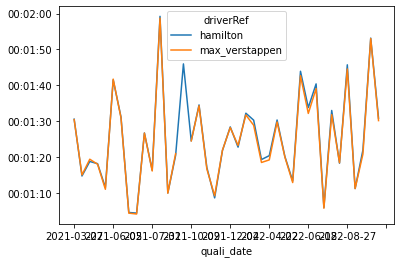

In [ ]:
qualifying_joined_multi_index['q1'][['hamilton', 'max_verstappen']].plot()

In [17]:
(qualifying_joined_multi_index['q1']['hamilton'] - qualifying_joined_multi_index['q1']['max_verstappen']).plot()

NameError: name 'qualifying_joined_multi_index' is not defined

In [18]:
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray
